In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import scipy.stats as st
import ast

In [214]:
# Checking the working directory

import os

print(os.getcwd())

c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025


In [215]:
# Downloading the dataset

import pandas as pd

# Load Pickle version

df = pd.read_pickle(r'c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025\df_clean.pkl')

In [216]:
# Create a copy of the original DataFrame for analysis purposes

df_copy = df.copy()

In [217]:
# Display summary information on the copy of original DataFrame

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           61953 non-null  int64         
 1   index                61953 non-null  int64         
 2   title                61953 non-null  object        
 3   company_name         61953 non-null  object        
 4   location             61916 non-null  object        
 5   via                  61944 non-null  object        
 6   description          61953 non-null  object        
 7   extensions           61953 non-null  object        
 8   job_id               61953 non-null  object        
 9   thumbnail            38194 non-null  object        
 10  posted_at            61763 non-null  object        
 11  schedule_type        61707 non-null  object        
 12  work_from_home       27980 non-null  object        
 13  salary               10088 non-

In [218]:
# Filter Data Frame to include only data for the year 2025

df_2025 = df_copy[df_copy['year'] == 2025].copy()

In [137]:
# Display summary information 2025 DataFrame

df_2025.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6583 entries, 461 to 31047
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           6583 non-null   int64         
 1   index                6583 non-null   int64         
 2   title                6583 non-null   object        
 3   company_name         6583 non-null   object        
 4   location             6583 non-null   object        
 5   via                  6583 non-null   object        
 6   description          6583 non-null   object        
 7   extensions           6583 non-null   object        
 8   job_id               6583 non-null   object        
 9   thumbnail            3407 non-null   object        
 10  posted_at            6442 non-null   object        
 11  schedule_type        6569 non-null   object        
 12  work_from_home       1908 non-null   object        
 13  salary               677 non-null  

In [138]:
# Verifying the descriptive statistics for filtered 2025 DataFrame

df_2025.describe()

,Unnamed: 0,index,date_time,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,year,month
count,6583.000000,6583.000000,6583,0.0,677.000000,659.000000,659.000000,201.000000,401.000000,677.000000,6583.0,6583.000000
mean,18128.317029,1289.971745,2025-02-21 19:05:56.612317184,NaN,64233.254505,53402.039970,76053.727011,34.932264,107144.976347,94142.825871,2025.0,2.276925
min,461.000000,0.000000,2025-01-01 04:00:08.023239,NaN,10.000000,8.000000,12.000000,10.000000,36091.000000,20800.000000,2025.0,1.000000
25%,5269.500000,859.000000,2025-01-28 04:00:15.350106112,NaN,52.500000,46.290000,65.000000,19.070000,79202.215000,69562.570000,2025.0,1.000000
50%,27756.000000,1270.000000,2025-02-18 04:00:18.766462976,NaN,68500.000000,60000.000000,78000.000000,32.500000,97407.000000,85000.000000,2025.0,2.000000
75%,29401.500000,1775.500000,2025-03-19 03:00:11.762270976,NaN,105000.000000,84017.000000,120000.000000,47.440000,129780.000000,114990.000000,2025.0,3.000000
max,31047.000000,2620.000000,2025-04-18 03:00:18.316061,NaN,290000.000000,265000.000000,338910.000000,90.000000,290000.000000,290000.000000,2025.0,4.000000
std,12745.798672,613.670297,NaN,NaN,60693.613479,49231.180181,72754.114353,18.359506,41121.503892,41114.547912,0.0,1.042850


In [139]:
# Record keeping for filtered data from df_copy Data Frame

print(f'Filtered {len(df_2025):,} job postings for year 2025')

Filtered 6,583 job postings for year 2025


In [140]:
# Check DataFrame df_2025 filtered data validation

assert df_2025['year'].nunique() == 1 and df_2025['year'].iloc[0] == 2025

In [142]:
# Log shape changes between df_copy and df_2025 Data Frames

print(f'Original: {df_copy.shape[0]:,} rows -> 2025 subset: {df_2025.shape[0]:,} rows')

Original: 61,953 rows -> 2025 subset: 6,583 rows


## Dataset Overview

This dataset has been filtered to include only job postings from 2025. It contains cleaned data on job titles, salary information, locations, employment types, remote work options, and platforms (websites). Below is a breakdown of key metadata and the preparatory steps taken before analysis.

In [220]:
# Select and reorder relevant columns for analysis, and reset index for clarity

df_2025 = df_2025[[
'date_time','date', 'year', 'month',
'company_name', 'location','website',
'employment_type','remote_work', 
'seniority_level','clean_title',
'salary_standardized','salary_hourly', 
'salary_yearly', 'job_skills'
]].reset_index(drop=True)

df_2025.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2025-04-18 03:00:13.756407,2025-04-18,2025,4,EY,"Denver, CO",ey careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,"[pyspark, power_bi, tableau, azure, javascript..."
1,2025-04-18 03:00:13.756407,2025-04-18,2025,4,GEHA,Anywhere,indeed,Full-Time,True,Intern,Data Analyst,52000.0,NaN,52000.0,"[excel, outlook, power_bi, spreadsheet, sql, w..."
2,2025-04-18 03:00:13.756407,2025-04-18,2025,4,Bloom Healthcare,"Littleton, CO",linkedin,Full-Time,False,,Data Analyst,NaN,NaN,NaN,"[sql, python]"
3,2025-04-18 03:00:13.756407,2025-04-18,2025,4,Ehub Global solution,"Denver, CO",indeed,Contract,False,,Data Analyst,106111.2,51.015,NaN,"[mongo, python, shell, pl/sql, sql]"
4,2025-04-18 03:00:13.756407,2025-04-18,2025,4,City of Grand Junction,"Grand Junction, CO",governmentjobs.com,Full-Time,False,,Data Analyst,81494.4,NaN,NaN,[]


In [144]:
# Assigning the data to a new DataFrame with reset index and renamed columns

df_2025_location = df_2025['location'].value_counts().head(10).reset_index()
df_2025_location.columns = ['location', 'count']
df_2025_location

,location,count
0,Anywhere,1908
1,United States,1406
2,"Denver, CO",819
3,"Colorado Springs, CO",435
4,"Aurora, CO",300
5,"Englewood, CO",206
6,"Boulder, CO",141
7,"Greenwood Village, CO",107
8,"Santa Fe, NM",101
9,"Grand Junction, CO",87


## Top U.S. Locations for Data Job Listings (2025)

This bar chart displays the U.S. locations with the highest concentration of data job postings in 2025. It provides insights into where data professionals are most in demand across the country.

The data reveals that "Anywhere" and "United States" are the most frequently listed locations, likely representing remote or unspecified postings. Following these, cities such as Oklahoma City, Kansas City, and Jefferson City emerge as notable hubs for data job opportunities.

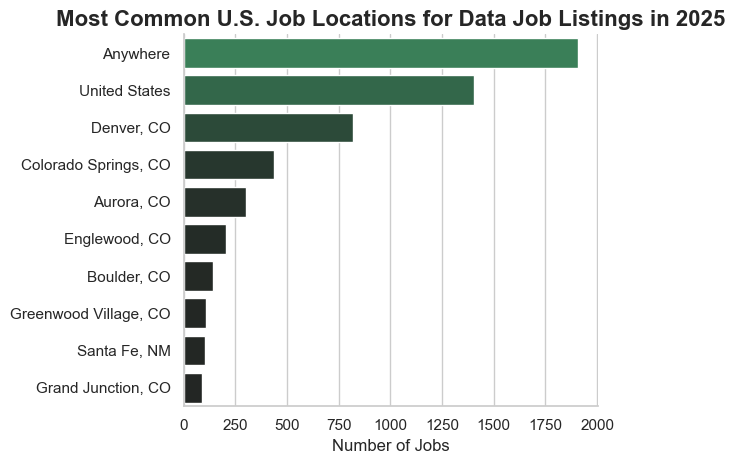

In [145]:
# Top U.S. Locations for data job interest — 2025 job market.


# Define chart style and color palette
sns.set_theme(style='whitegrid')
palette = sns.dark_palette('seagreen',n_colors=5, reverse=False, as_cmap=True)

sns.barplot(data=df_2025_location, x='count', y='location', hue='count', palette=palette, legend=False)
sns.despine()
plt.title('Most Common U.S. Job Locations for Data Job Listings in 2025', fontsize=16, fontweight='bold')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Remote Work & Salary Insights for Analyst Roles (2025)

### Remote Work Availability in 2025

The pie chart below illustrates the distribution of data analyst job postings offering remote work options versus those that do not in 2025. This provides a clear overview of how flexible data roles were during that year.

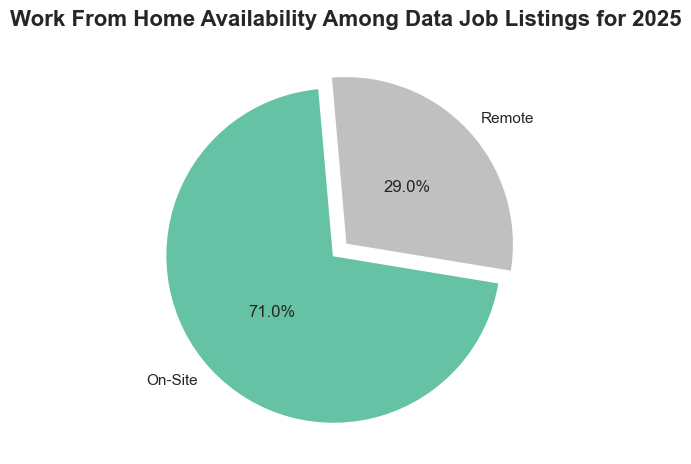

In [146]:
# Pie Chart: 2025 U.S. Data Job Listings with Remote Work Availability


# Count remote work availability categories
df_2025_pie_plot = df_2025['remote_work'].value_counts()

# Modify labels for clarity and extract slice sizes from data
labels = ['On-Site', 'Remote']
sizes = df_2025_pie_plot.values.tolist()
# Set colours to match labels
colours = ['#66c2a5', 'silver']
# Explode the first slice to emphasize it
explode = [0.1] + [0] * (len(labels) - 1)

# Plot the Pie Chart
df_2025_pie_plot.plot(kind='pie', labels=labels, startangle=95, autopct='%1.1f%%', 
              colors=colours, explode=explode, pctdistance=0.50)

# Add titles and chart formating
plt.title('Work From Home Availability Among Data Job Listings for 2025', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Analyst Roles: Remote vs. Onsite Jobs with Salary Insights (2024)

This analysis explores how remote work flexibility correlates with median salaries for analyst roles in 2024. The horizontal bar chart below compares the median salaries between remote and onsite positions across various seniority levels

In [147]:
# Filter analyst roles with salary data

df_2025_analyst_remote_option = df_2025[df_2025['clean_title'].str.contains('analyst', case=False, na=False)
                                        & df_2025['salary_yearly'].notna()
                                        & df_2025['remote_work'].notna()
                                        & df_2025['seniority_level'].notna()
                                        ].copy()

df_2025_analyst_remote_option.sample(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
4322,2025-01-16 04:00:16.293268,2025-01-16,2025,1,Conga,"Broomfield, CO",linkedin,Contract,False,,Business Analyst,94349.00,NaN,94349.00,"[power_bi, tableau, powerpoint, excel, looker,..."
389,2025-04-13 03:00:08.246313,2025-04-13,2025,4,Hensel Phelps Construction Co,Anywhere,indeed,Full-Time,True,,Data Analyst,88500.00,NaN,88500.00,"[power_bi, c, azure, sap, dax, sql]"
474,2025-04-16 03:00:10.871943,2025-04-16,2025,4,Nordstrom,"Centennial, CO",experteer,Full-Time,False,,Data Analyst,108267.00,NaN,108267.00,"[tableau, plotly, looker, power_bi, sql, redsh..."
58,2025-04-03 03:00:18.679527,2025-04-03,2025,4,State of Colorado Job Opportunities,Anywhere,indeed,Full-Time,True,,Data Analyst,80000.18,NaN,80000.18,"[tableau, excel, power_bi]"
2281,2025-03-01 04:00:24.944505,2025-03-01,2025,3,Phaxis,United States,linkedin,Full-Time,False,,Data Analyst,200000.00,NaN,200000.00,"[pandas, gcp, aws, python, numpy, tensorflow, ..."


In [148]:
# Strip whitespace and drop empty strings

df_2025_analyst_remote_option['seniority_level'] = (
    df_2025_analyst_remote_option['seniority_level']
    .str.strip()  
    .replace('', np.nan)  #Treat empty strings as NaN values
)

In [149]:
# Count analyst job postings by remote status

analyst_remote_count_2025 = df_2025_analyst_remote_option['remote_work'].value_counts().reset_index()
analyst_remote_count_2025

,remote_work,count
0,False,293
1,True,62


In [150]:
# Group by both remote work and seniority, and calculate median salary

analyst_median_salary_2025 = df_2025_analyst_remote_option.groupby(
    ['remote_work', 'seniority_level']
)['salary_yearly'].median().reset_index()

analyst_median_salary_2025

,remote_work,seniority_level,salary_yearly
0,False,Director,114400.00
1,False,Intern,36400.00
2,False,Junior,106750.00
3,False,Lead,140000.00
4,False,Manager,123025.00
5,False,Mid-Level,150590.00
6,False,Principal,157500.25
7,False,Senior,123000.00
8,True,Intern,52000.00
9,True,Junior,90000.00


In [151]:
# Merge counts and median salary

analyst_median_salary_2025 = pd.merge(analyst_remote_count_2025, analyst_median_salary_2025, on='remote_work')
analyst_median_salary_2025

,remote_work,count,seniority_level,salary_yearly
0,False,293,Director,114400.00
1,False,293,Intern,36400.00
2,False,293,Junior,106750.00
3,False,293,Lead,140000.00
4,False,293,Manager,123025.00
5,False,293,Mid-Level,150590.00
6,False,293,Principal,157500.25
7,False,293,Senior,123000.00
8,True,62,Intern,52000.00
9,True,62,Junior,90000.00


In [152]:
# Renaming salary column for clarity

analyst_median_salary_2025 = analyst_median_salary_2025.rename(columns={'salary_yearly' : 'median_salary'})
analyst_median_salary_2025

,remote_work,count,seniority_level,median_salary
0,False,293,Director,114400.00
1,False,293,Intern,36400.00
2,False,293,Junior,106750.00
3,False,293,Lead,140000.00
4,False,293,Manager,123025.00
5,False,293,Mid-Level,150590.00
6,False,293,Principal,157500.25
7,False,293,Senior,123000.00
8,True,62,Intern,52000.00
9,True,62,Junior,90000.00


## Analyst Roles: Remote vs. Onsite Jobs with Salary Insights (2025)

This analysis examines how remote work flexibility correlates with median salaries for analyst roles in 2025. 
The horizontal bar chart below compares the median salaries between remote and onsite positions across various seniority levels.

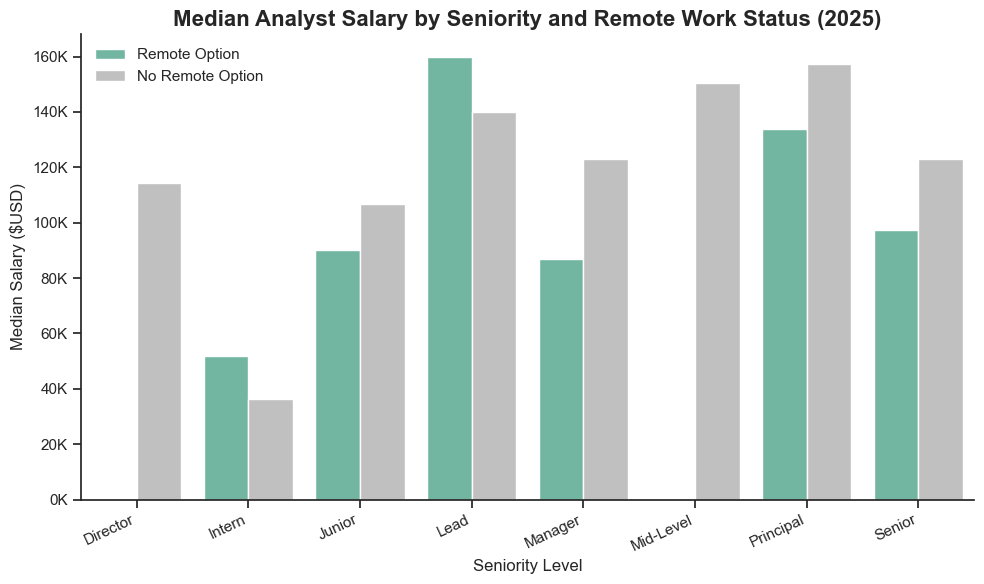

Text(0.5, -0.08, '*Note: Analyst roles with missing seniority information were excluded.This is likely biased results toward director-level and mid_level management remote-friendly roles,inflating salaries in the remote category.')

<Figure size 640x480 with 0 Axes>

In [154]:
# Median Salary by Remote Work Status (2025 Analyst Job Posting Roles)

# Map remote_work boolean to readable labels
label_map = {True: 'Remote Option', False: 'No Remote Option'}
analyst_median_salary_2025['remote_label'] = analyst_median_salary_2025['remote_work'].map(label_map)

# Set theme
sns.set_theme(style='ticks')
plt.figure(figsize=(10, 6))

# Plot bar chart using mapped labels and fixed hue order
ax = sns.barplot(
    data=analyst_median_salary_2025,
    x='seniority_level',
    y='median_salary',
    hue='remote_label',
    hue_order=['Remote Option', 'No Remote Option'],  # Enforce order
    palette=['#66c2a5', 'silver']   # Remote = greenish, No Remote = silver
)

# Add labels and formatting
plt.title('Median Analyst Salary by Seniority and Remote Work Status (2025)', fontsize=16, fontweight='bold')
plt.xlabel('Seniority Level')
plt.ylabel('Median Salary ($USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y / 1000)}K'))
plt.xticks(rotation=25, horizontalalignment='right')
sns.despine()
plt.legend(frameon=False, loc='upper left') # Format legend for better visibility
plt.tight_layout()
plt.show()

# Add footnote below chart
plt.figtext(
    0.5, -0.08,
    '*Note: Analyst roles with missing seniority information were excluded.'
    'This is likely biased results toward director-level and mid_level management remote-friendly roles,'
    'inflating salaries in the remote category.',
    wrap=True, ha='center', fontsize=9, style='italic'
)

# Employment Type for Data Roles (2024)
Full-Time, Part_time, contract and other work arrangement are shown in the chart below.
Understanding employment types helps identify how data jobs are being structured in 2024

In [155]:
# Prepare top 10 work arrangements for graphing

df_2025_schedule =df_2025['employment_type'].value_counts().head(10).reset_index()
df_2025_schedule.columns = ['employment_type', 'count']
df_2025_schedule

,employment_type,count
0,Full-Time,5826
1,Part-Time,323
2,Contract,312
3,Internship,108
4,Other,14


## Employment Types for Data Roles (2025)

The chart below illustrates the distribution of employment types—such as full-time, part-time, contract, and other work arrangements—among data roles in 2025. Understanding these employment structures provides valuable insights into how data positions are organized and the flexibility they offer.

C:\Users\lisad\AppData\Local\Temp\ipykernel_9956\3827865882.py:8: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=df_2025_schedule,


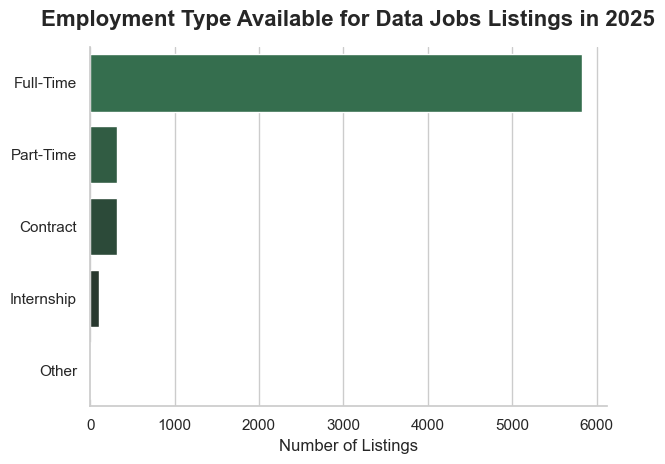

In [156]:
# Visualizing Employment Type Availability in 2024 U.S. Data Job Postings

# Define chart style and color palette
sns.set_theme(style='whitegrid')
palette = sns.dark_palette('seagreen')

# Plot the data and format the chart
sns.barplot(data=df_2025_schedule,
             x='count', y='employment_type', 
             hue='count', palette=palette, legend=False)
sns.despine()
plt.title('Employment Type Available for Data Jobs Listings in 2025', 
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Listings')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Where Analyst Jobs Were Posted Most Often (2025)

This section identifies the top websites where analyst roles were posted in 2025. It also compares the posting volume and median salary per site.

In [221]:
# Filter Analyst job titles rows with valid salary and website info

df_2025_DA = df_2025[df_2025['clean_title'].str.contains('analyst', case=False, na=False)
                     & df_2025['salary_yearly'].notna()
                     & df_2025['website'].notna()
                     ].copy()
df_2025_DA.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
1,2025-04-18 03:00:13.756407,2025-04-18,2025,4,GEHA,Anywhere,indeed,Full-Time,True,Intern,Data Analyst,52000.00,NaN,52000.00,"[excel, outlook, power_bi, spreadsheet, sql, w..."
6,2025-04-18 03:00:13.756407,2025-04-18,2025,4,Fanatics,"Denver, CO (+1 other)",built in colorado,Full-Time,False,,Data Analyst,153000.00,NaN,153000.00,"[tableau, excel, sql]"
9,2025-04-18 03:00:13.756407,2025-04-18,2025,4,Gunnison County,"Gunnison, CO",dataanalyst.com,Full-Time,False,,Data Analyst,60100.00,NaN,60100.00,[sql]
57,2025-04-03 03:00:18.679527,2025-04-03,2025,4,TRILLIUM HEALTH RESOURCES,Anywhere,indeed,Full-Time,True,Senior,Business Analyst,64203.00,NaN,64203.00,"[aws, go]"
58,2025-04-03 03:00:18.679527,2025-04-03,2025,4,State of Colorado Job Opportunities,Anywhere,indeed,Full-Time,True,,Data Analyst,80000.18,NaN,80000.18,"[tableau, excel, power_bi]"


In [222]:
# Display summary information of Data Analyst and Analytics DataFrame

df_2025_DA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 1 to 6564
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            355 non-null    datetime64[ns]
 1   date                 355 non-null    object        
 2   year                 355 non-null    int32         
 3   month                355 non-null    int32         
 4   company_name         355 non-null    object        
 5   location             355 non-null    object        
 6   website              355 non-null    object        
 7   employment_type      355 non-null    object        
 8   remote_work          355 non-null    bool          
 9   seniority_level      355 non-null    object        
 10  clean_title          355 non-null    object        
 11  salary_standardized  355 non-null    float64       
 12  salary_hourly        0 non-null      float64       
 13  salary_yearly        355 non-null    fl

In [223]:
# Verifying the descriptive statistics for df_2025_DA DataFrame

df_2025_DA.describe()

,date_time,year,month,salary_standardized,salary_hourly,salary_yearly
count,355,355.0,355.000000,355.000000,0.0,355.000000
mean,2025-02-26 17:59:42.840376320,2025.0,2.430986,101839.345676,NaN,101839.345676
min,2025-01-01 04:00:08.023239,2025.0,1.000000,36091.000000,NaN,36091.000000
25%,2025-02-01 04:00:10.142825984,2025.0,2.000000,77025.000000,NaN,77025.000000
50%,2025-02-27 04:00:23.046351872,2025.0,2.000000,92250.000000,NaN,92250.000000
75%,2025-03-23 15:00:12.901050880,2025.0,3.000000,120000.000000,NaN,120000.000000
max,2025-04-18 03:00:13.756407,2025.0,4.000000,290000.000000,NaN,290000.000000
std,NaN,0.0,1.074958,37108.055736,NaN,37108.055736


In [247]:
# Calculate the number of analyst listing per website

website_2025_count_DA = df_2025_DA['website'].value_counts().head(10).reset_index()
website_2025_count_DA.columns = ['website', 'post_count']
website_2025_count_DA

,website,post_count
0,linkedin,110
1,indeed,81
2,governmentjobs.com,42
3,aijobs.net,31
4,dataanalyst.com,13
5,built in,12
6,Recruiter.com,10
7,spectrum careers,9
8,The Ladders,7
9,paylocity,7


In [248]:
# Calculate analyst median salary for each website

DA_median_2025_salary = df_2025_DA.groupby('website')['salary_yearly'].median().reset_index()
DA_median_2025_salary.sample(5)

,website,salary_yearly
16,robert half,102000.00
2,The Ladders,92500.00
6,built in boston,75000.00
21,zippia,64750.00
15,paylocity,69562.57


In [249]:
# Merge the DataFrames on website

DA_top_website_with_2025_salary = pd.merge(website_2025_count_DA, DA_median_2025_salary, on='website')

In [250]:
# Renaming column for clarity

DA_top_website_with_2025_salary = DA_top_website_with_2025_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count' : 'post_count'
                                                                                  })

DA_top_website_with_2025_salary

,website,post_count,median_salary
0,linkedin,110,115000.00
1,indeed,81,86236.80
2,governmentjobs.com,42,60000.00
3,aijobs.net,31,129780.00
4,dataanalyst.com,13,87050.00
5,built in,12,107089.00
6,Recruiter.com,10,83500.00
7,spectrum careers,9,87050.00
8,The Ladders,7,92500.00
9,paylocity,7,69562.57


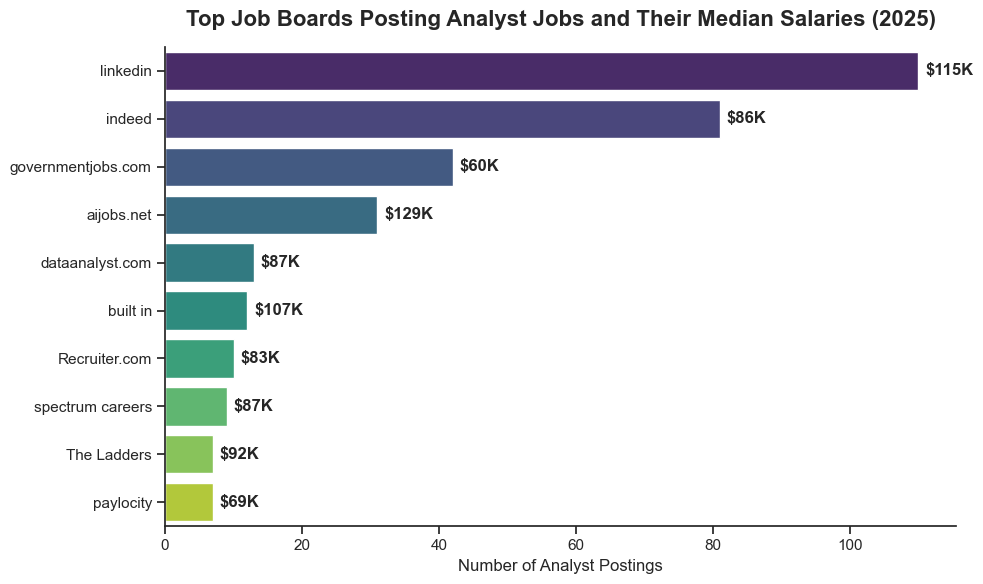

In [251]:
# Top U.S. Job Sites for Analyst Roles with 2025 Salary Data

# Set chart theme and size
sns.set_theme(style='ticks')
plt.figure(figsize=(10, 6))

# Create barplot
ax = sns.barplot(
    data=DA_top_website_with_2025_salary,
    x='post_count',
    y='website',
    hue='website',
    palette='viridis'
)

# Title and labels

plt.title('Top Job Boards Posting Analyst Jobs and Their Median Salaries (2025)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Analyst Postings')
plt.ylabel('')

# Remove spines 
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

# Annotate with median salaries
for i, (count, salary) in enumerate(zip(
    DA_top_website_with_2025_salary['post_count'],
    DA_top_website_with_2025_salary['median_salary']
)):
    ax.text(
        count + 1,  # offset the text slightly to the right
        i,           # y-coordinate is the index
        f'${int(salary/1000):,}K',  # format salary
        va='center',
        fontsize=12,
        fontweight='semibold'
    )

plt.tight_layout()
plt.show()

## Where Data Engineer and Data Scientist Jobs Were Posted Most Often (2025)

This section identifies the top websites where Data Engineer and Data Scientist roles were posted in 2025. It also compares the posting volume and median salary per site.
This analysis provides insights into the distribution of Data Engineer and Data Scientist job postings across different platforms and the associated compensation levels.

In [229]:
# Filter job titles Data Engineer rows with valid salary and website info

df_2025_DE = df_2025[df_2025['clean_title'].str.contains('Data Engineer', case=False, na=False)
                     & df_2025['salary_yearly'].notna()
                     & df_2025['website'].notna()
                     ].copy()

df_2025_DE.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
1616,2025-03-08 04:00:19.057327,2025-03-08,2025,3,PNC,United States,aijobs.net,Full-Time,False,,Data Engineer,154000.0,NaN,154000.0,[]
1699,2025-03-05 04:00:22.390590,2025-03-05,2025,3,CGS,United States,linkedin,Full-Time,False,Senior,Data Engineer,167786.5,NaN,167786.5,"[tableau, sql]"
1810,2025-03-14 03:00:23.027422,2025-03-14,2025,3,Cadmus,"Cheyenne, WY",linkedin,Full-Time,False,,Data Engineer,85000.0,NaN,85000.0,"[powerpoint, excel, sas, word, r, python]"
2069,2025-02-27 04:00:26.695761,2025-02-27,2025,2,Jobs via Dice,"Boulder, CO",linkedin,Full-Time,False,Lead,Data Engineer,132500.0,NaN,132500.0,"[aws, jira, spark, sql, docker, git, python, p..."
2505,2025-03-13 03:00:15.932208,2025-03-13,2025,3,Vanguard,United States,aijobs.net,Full-Time,False,Senior,Data Engineer,105600.0,NaN,105600.0,"[pyspark, aws, bitbucket, spark, sql, redshift..."


In [230]:
# Display summary information of Data Engineer DataFrame

df_2025_DE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 1616 to 6393
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            19 non-null     datetime64[ns]
 1   date                 19 non-null     object        
 2   year                 19 non-null     int32         
 3   month                19 non-null     int32         
 4   company_name         19 non-null     object        
 5   location             19 non-null     object        
 6   website              19 non-null     object        
 7   employment_type      19 non-null     object        
 8   remote_work          19 non-null     bool          
 9   seniority_level      19 non-null     object        
 10  clean_title          19 non-null     object        
 11  salary_standardized  19 non-null     float64       
 12  salary_hourly        0 non-null      float64       
 13  salary_yearly        19 non-null     

In [231]:
# Verifying the descriptive statistics for Data Engineer DataFrame

df_2025_DE.describe()

,date_time,year,month,salary_standardized,salary_hourly,salary_yearly
count,19,19.0,19.000000,19.000000,0.0,19.000000
mean,2025-02-11 08:53:57.310033152,2025.0,1.947368,138073.394737,NaN,138073.394737
min,2025-01-01 04:00:08.023239,2025.0,1.000000,65200.000000,NaN,65200.000000
25%,2025-01-26 04:00:09.576013568,2025.0,1.000000,110300.000000,NaN,110300.000000
50%,2025-02-17 04:00:17.912043008,2025.0,2.000000,137500.000000,NaN,137500.000000
75%,2025-03-02 04:00:24.543175424,2025.0,2.500000,160893.250000,NaN,160893.250000
max,2025-03-14 03:00:23.027422,2025.0,3.000000,230695.000000,NaN,230695.000000
std,NaN,0.0,0.779864,41120.878004,NaN,41120.878004


In [252]:
# Count number of job listings for Data Engineer per website 

website_2025_count_DE = df_2025_DE['website'].value_counts().head(5).reset_index()
website_2025_count_DE.columns = ['website', 'post_count']
website_2025_count_DE.columns

Index(['website', 'post_count'], dtype='object')

In [253]:
# Calculate Data Engineer median salary for each of the websites

DE_2025_median_salary = df_2025_DE.groupby('website')['salary_yearly'].median().reset_index()

In [254]:
# Merge the DataFrame: website_counts_DE, DE_2025_median_salary, on website

DE_top_2025_website_with_salary = pd.merge(website_2025_count_DE, DE_2025_median_salary, on='website' )

In [255]:
# Renaming column for clarity

DE_top_2025_website_with_salary = DE_top_2025_website_with_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count' : 'post_count'
                                                                                  })

DE_top_2025_website_with_salary

,website,post_count,median_salary
0,linkedin,13,132500.0
1,aijobs.net,5,144000.0
2,adzuna,1,197500.0


In [256]:
# Filter job titles Data Scientist rows with valid salary and website info

df_2025_DS = df_2025[df_2025['clean_title'].str.contains('Data Scientist', case=False, na=False)
                     & df_2025['salary_yearly'].notna()
                     & df_2025['website'].notna()
                     ].copy()

df_2025_DS.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
373,2025-04-05 03:00:09.280541,2025-04-05,2025,4,Harnham,United States,linkedin,Full-Time,False,,Data Scientist,190000.0,NaN,190000.0,"[hadoop, gcp, aws, python, postgresql, spark, ..."
1100,2025-04-08 03:00:12.959564,2025-04-08,2025,4,Harris Health,United States,linkedin,Full-Time,False,Principal,Data Scientist,187262.4,NaN,187262.4,"[aws, azure, sas, pytorch, hadoop, spark, sql,..."
2034,2025-03-01 04:00:24.944505,2025-03-01,2025,3,Certus Recruitment Group,Anywhere,linkedin,Full-Time,True,,Data Scientist,225000.0,NaN,225000.0,"[airflow, docker, python, spark, c]"
2097,2025-02-28 04:00:15.000327,2025-02-28,2025,2,USAA,"Colorado Springs, CO",linkedin,Full-Time,False,Mid-Level,Data Scientist,166055.0,NaN,166055.0,"[sql, nosql, r, python]"
2099,2025-02-28 04:00:18.349682,2025-02-28,2025,2,USAA,"Colorado Springs, CO",linkedin,Full-Time,False,Lead,Data Scientist,230695.0,NaN,230695.0,"[sas, sql, r, python]"


In [257]:
# Display summary information of Data Scientist DataFrame

df_2025_DS.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 373 to 6118
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            25 non-null     datetime64[ns]
 1   date                 25 non-null     object        
 2   year                 25 non-null     int32         
 3   month                25 non-null     int32         
 4   company_name         25 non-null     object        
 5   location             25 non-null     object        
 6   website              25 non-null     object        
 7   employment_type      25 non-null     object        
 8   remote_work          25 non-null     bool          
 9   seniority_level      25 non-null     object        
 10  clean_title          25 non-null     object        
 11  salary_standardized  25 non-null     float64       
 12  salary_hourly        0 non-null      float64       
 13  salary_yearly        25 non-null     f

In [258]:
# Verifying the descriptive statistics for Data Scientist DataFrame
df_2025_DS.describe()

,date_time,year,month,salary_standardized,salary_hourly,salary_yearly
count,25,25.0,25.000000,25.000000,0.0,25.000000
mean,2025-02-05 21:09:49.353409792,2025.0,1.680000,160592.552000,NaN,160592.552000
min,2025-01-03 04:00:11.723151,2025.0,1.000000,87875.000000,NaN,87875.000000
25%,2025-01-14 04:00:07.810394880,2025.0,1.000000,127500.000000,NaN,127500.000000
50%,2025-01-30 04:00:14.096911104,2025.0,1.000000,157500.000000,NaN,157500.000000
75%,2025-02-28 04:00:15.000326912,2025.0,2.000000,190000.000000,NaN,190000.000000
max,2025-04-08 03:00:12.959564,2025.0,4.000000,260700.000000,NaN,260700.000000
std,NaN,0.0,0.945163,49179.482867,NaN,49179.482867


In [259]:
# Count number of job listings for Data Scientist per website 

website_2025_count_DS = df_2025_DS['website'].value_counts().head(5).reset_index()
website_2025_count_DS.columns = ['website', 'post_count']
website_2025_count_DS.columns

Index(['website', 'post_count'], dtype='object')

In [260]:
# Calculate Data Scientist median salary for each of the websites job listings 

DS_2025_median_salary = df_2025_DS.groupby('website')['salary_yearly'].median().reset_index()

In [261]:
# Merge the DataFrame: website_counts_DE, DS_2025_median_salary, on website

DS_top_2025_website_with_salary = pd.merge(website_2025_count_DS, DS_2025_median_salary, on='website' )

In [262]:
# Renaming column for clarity

DS_top_2025_website_with_salary = DS_top_2025_website_with_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count' : 'post_count'
                                                                                  })

DS_top_2025_website_with_salary

,website,post_count,median_salary
0,linkedin,19,161509.0
1,aijobs.net,4,145000.0
2,adzuna,1,145000.0
3,The Ladders,1,140000.0


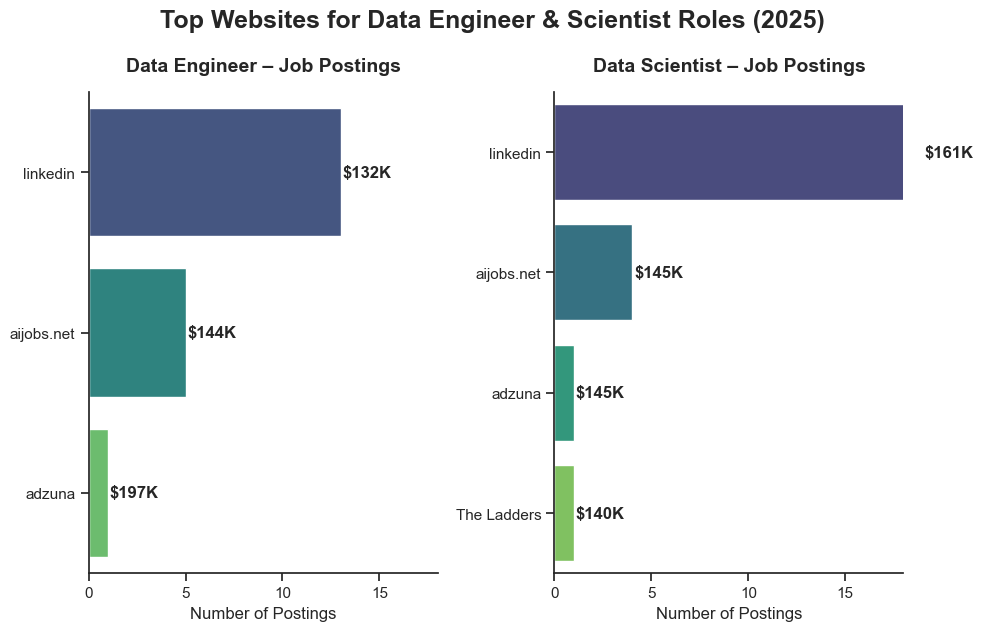

In [263]:
# Top U.S. Job Sites for Data Engineer and Data Scientist Roles with 2025 Salary Data


# Create summary DataFrames for DE & DS
DE_summary = DE_top_2025_website_with_salary.copy()
DE_summary['Role'] = 'Data Engineer'

# Create dummy DS data or use your real filtered df_2025_DS
DS_summary = DS_top_2025_website_with_salary.copy()
DS_summary['Role'] = 'Data Scientist'

# Combine into one DataFrame
combined_summary = pd.concat([DE_summary, DS_summary])

# Plot subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharex=False)

# Remove spines 
sns.despine()

# Annotation of Data Engineer and Data Scientist roles
for ax, role in zip(axes, combined_summary['Role'].unique()):
    subset = combined_summary[combined_summary['Role'] == role]
    sns.barplot(data=subset, x='post_count', y='website', hue='website', ax=ax, palette='viridis')
    ax.set_title(f'{role} – Job Postings', fontsize=14, fontweight='semibold', pad=15)
    ax.set_xlabel('Number of Postings')
    ax.set_xlim(0, 18)
    ax.set_ylabel('')
  
    # Annotation Median Salary for Roles
    for i, (count, salary) in enumerate(zip(subset['post_count'], subset['median_salary'])):
        ax.text(count + 0.1, i, f'${int(salary/1000):,}K', va='center', fontsize=12, fontweight='semibold')
        

plt.tight_layout()
plt.suptitle('Top Websites for Data Engineer & Scientist Roles (2025)', fontsize=18, fontweight='bold', y=1.05)
plt.show()